In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
import h5py
import multigrate
from mofapy2.run.entry_point import entry_point

In [2]:
%config InlineBackend.figure_format = 'retina'

# MOFA 2

## Load the datasets

In [3]:
scrna = sc.read_h5ad('../data/cao-2018/kidney/rna/expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 7362 × 4000
    obs: 'source', 'replicate', 'experiment', 'tsne_1', 'tsne_2', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_type', 'gene_short_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
scatac = sc.read_h5ad('../data/cao-2018/kidney/atac/peaks.h5ad')
scatac

AnnData object with n_obs × n_vars = 7362 × 41524
    obs: 'replicate', 'cell_type', 'nb_features'
    var: 'chr', 'start', 'end', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

In [7]:
scrna1 = scrna[scrna.obs['replicate'] == 'Replicate 1']
scrna2 = scrna[scrna.obs['replicate'] == 'Replicate 2']

In [8]:
scrna1

View of AnnData object with n_obs × n_vars = 3789 × 4000
    obs: 'source', 'replicate', 'experiment', 'tsne_1', 'tsne_2', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_type', 'gene_short_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [9]:
scrna2

View of AnnData object with n_obs × n_vars = 3573 × 4000
    obs: 'source', 'replicate', 'experiment', 'tsne_1', 'tsne_2', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_type', 'gene_short_name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [13]:
scatac1 = scatac[scatac.obs['replicate'] == 'Replicate 1']
scatac2 = scatac[scatac.obs['replicate'] == 'Replicate 2']

In [14]:
scatac1

View of AnnData object with n_obs × n_vars = 3789 × 41524
    obs: 'replicate', 'cell_type', 'nb_features'
    var: 'chr', 'start', 'end', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

In [15]:
scatac2

View of AnnData object with n_obs × n_vars = 3573 × 41524
    obs: 'replicate', 'cell_type', 'nb_features'
    var: 'chr', 'start', 'end', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'neighbors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'binary'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [16]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [17]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [18]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [scatac1.X.A, scatac2.X.A]],
    views_names=['scRNA', 'scATAC'],
    groups_names=['Replicate 1', 'Replicate 2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='Replicate 1' with N=3789 samples and D=4000 features...
Successfully loaded view='scRNA' group='Replicate 2' with N=3573 samples and D=4000 features...
Successfully loaded view='scATAC' group='Replicate 1' with N=3789 samples and D=41524 features...
Successfully loaded view='scATAC' group='Replicate 2' with N=3573 samples and D=41524 features...





In [19]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scATAC): gaussian




In [20]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

In [21]:
ent.build()

In [22]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -4101278000.76 

Iteration 1: time=107.04, ELBO=-29787524.29, deltaELBO=4071490476.469 (99.27370141%), Factors=19
Iteration 2: time=93.22, ELBO=-28889739.71, deltaELBO=897784.588 (0.02189036%), Factors=18
Iteration 3: time=87.59, ELBO=-28806393.08, deltaELBO=83346.630 (0.00203221%), Factors=17
Iteration 4: time=83.26, ELBO=-28741742.72, deltaELBO=64650.358 (0.00157635%), Factors=16
Iteration 5: time=79.01, ELBO=-28687510.55, deltaELBO=54232.171 (0.00132232%), Factors=15
Iteration 6: time=74.56, ELBO=-28639300.38, deltaELBO=48210.172 (0.00117549%), Factors=14
Iteration 7: time=70.24, ELBO=-28591619.29, deltaELBO=47681.087 (0.00116259%), Factors=13
Iteration 8: time=65.97, ELBO=-28544295.30, deltaELBO=47323.988 (0.00115388%), Factors=12
Iteration 9: time=61.09, ELBO=-28497407.72, deltaELBO=46887.579 (0.00114324%), Factors=11
Iteration 10: time=56.44

In [23]:
outfile = 'cao2018-kidney-mofa2.hdf5'
ent.save(outfile)

Saving model in cao2018-kidney-mofa2.hdf5...


In [24]:
f = h5py.File(outfile)

In [25]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T

In [26]:
z.shape

(7362, 8)

In [27]:
# zs = np.concatenate([v[:] for k, v in f["samples"].items()], axis=0).astype(str)
# z = pd.DataFrame(z, index=zs).loc[adata.obs_names.values].to_numpy()

In [28]:
# adata.obsm['X_mofa'] = z
# w = np.concatenate([v[:,:] for k, v in f['expectations']['W'].items()], axis=1).T
# adata.varm['LFs'] = w

In [29]:
# np.concatenate([v[:,:] for k, v in f['expectations']['W'].items()], axis=1).T.shape

In [30]:
# f.keys()

In [31]:
# [v for k, v in f['expectations']['W'].items()]

In [32]:
z = sc.AnnData(z)
z.obs['cell_type'] = scrna.obs['cell_type'].tolist()
z.obs['batch'] = scrna.obs['replicate'].tolist()

In [33]:
sc.pp.neighbors(z)
sc.tl.umap(z)

... storing 'cell_type' as categorical
... storing 'batch' as categorical


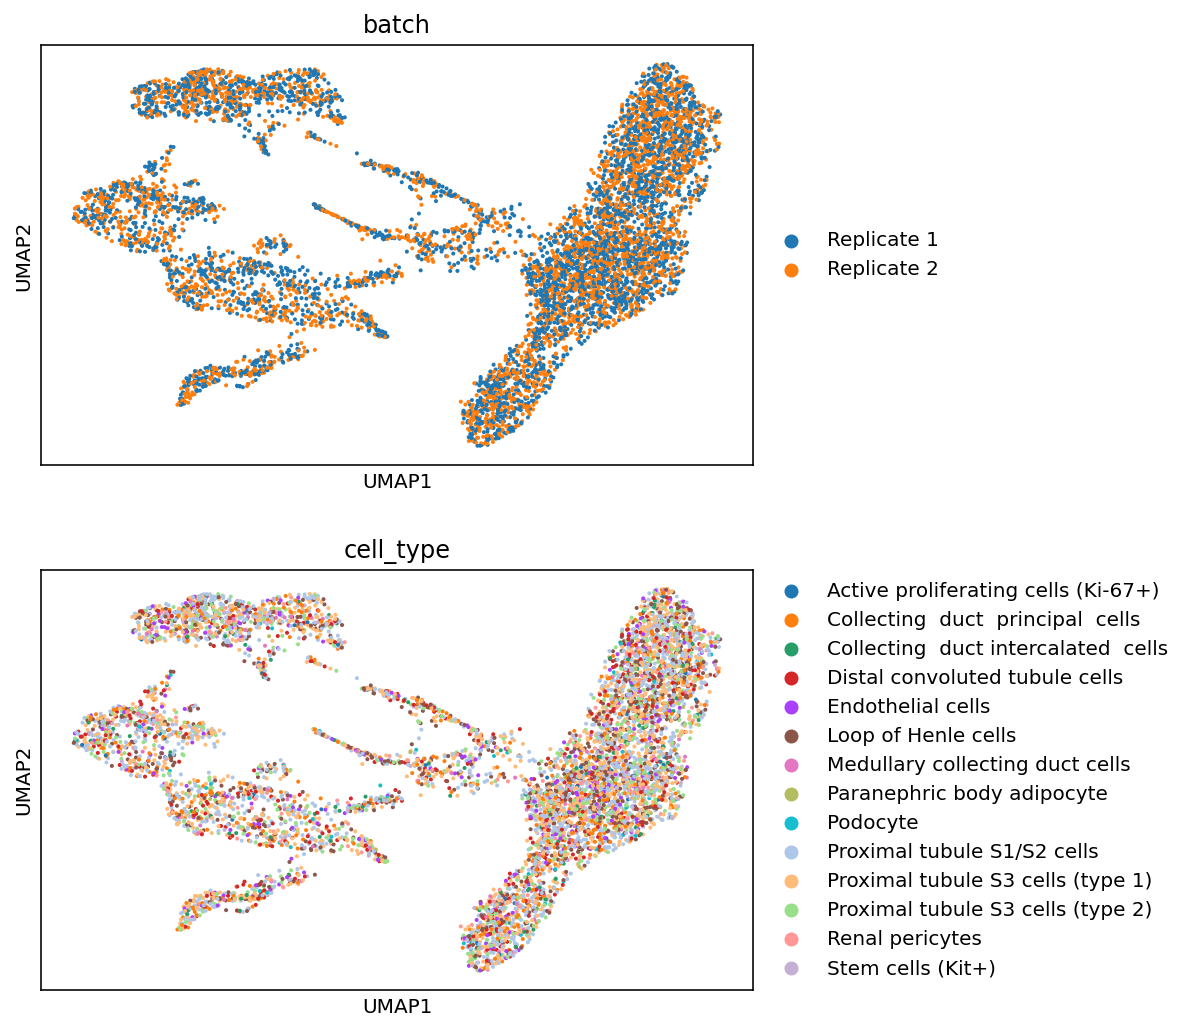

In [34]:
sc.pl.umap(z, color=['batch', 'cell_type'], ncols=1)

In [35]:
sc.pp.pca(z)
multigrate.metrics.metrics(
    z, z,
    batch_key='batch',
    label_key='cell_type',
    isolated_label_asw=False,
    method='MOFA'
)

Clustering...
ASW label/batch...
PCR batch...
Graph connectivity...
ASW label...
NMI cluster/label...
ARI cluster/label...


,score
ASW_label/batch,0.959709
PCR_batch,0.000000
graph_conn,0.175536
ASW_label,0.454880
NMI_cluster/label,0.008563
ARI_cluster/label,0.000430
